<a href="https://colab.research.google.com/github/WahlerP/ns_cs_fundamentals/blob/main/03_07_Merging_Databases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

< [Previous Page](https://colab.research.google.com/github/WahlerP/ns_cs_fundamentals/blob/main/03_06_Limit_Clause.ipynb#scrollTo=LsPl69jWmQVd) | [Home Page](https://wahlerp.github.io/) | [Next Page](https://colab.research.google.com/github/WahlerP/ns_cs_fundamentals/blob/main/03_08_Manipulating_Databases.ipynb) >

<a href="https://colab.research.google.com/github/WahlerP/ns_cs_fundamentals/blob/main/03_07_Merging_Databases.ipynb#scrollTo=dvg8Cuvw_DWJ"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

## Joining Databases

So far we've been looking at queries that only pull data from one table. However, one of the reasons SQL is so powerful is that it allows us to pull data from multiple tables in the same query.

A JOIN clause is used to combine rows from two or more tables, based on a related column between them.

Before we show how to join different tables, we must understand the different ways a database can be joined. In general the following options exist:

- (INNER) JOIN: Returns records that have matching values in both tables
- LEFT (OUTER) JOIN: Returns all records from the left table, and the matched records from the right table
- RIGHT (OUTER) JOIN: Returns all records from the right table, and the matched records from the left table
- FULL (OUTER) JOIN: Returns all records when there is a match in either left or right table

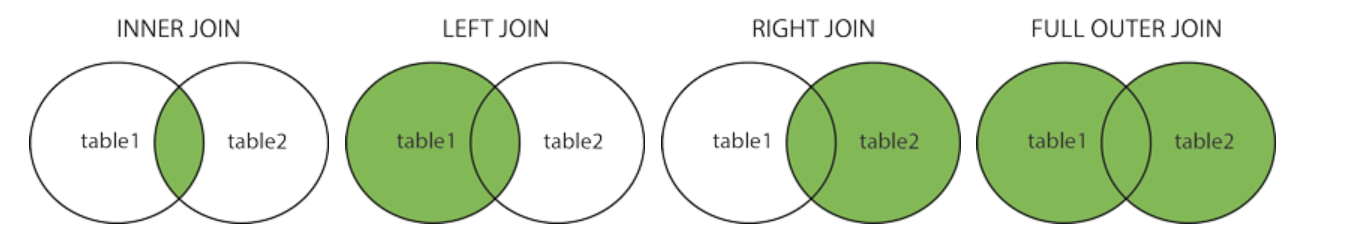

## INNER JOIN

For the sake of this course, we'll only look at the INNER JOIN clause. 


The syntax looks as follows:

```
SELECT column_name(s)
FROM table1
INNER JOIN table2
ON table1.column_name = table2.column_name;
```

**Joining two Tables**

Let's imagine we have the following two tables ORDERS and CUSTOMERS that are related via the CustomerID (both have several of thousand rows)

<br>

|OrderID	|CustomerID|	OrderDate| ShipperID
|:-|:-|:-|:-|
|10308|	2	|1996-09-18| 1
|10309|	37	|1996-09-19| 2
|10310|	77|	1996-09-20|3 
|...|...|...|...
|*ORDERS Table*

<br>

|CustomerID	|CustomerName|	ContactName|	Country
|:-|:-|:-|:-|
|1|	Alfreds Futterkiste|	Maria Anders	|Germany
|2|	Ana Trujillo Emparedados y helados|	Ana Trujillo	|Mexico
|3|	Antonio Moreno Taquería	|Antonio Moreno|	Mexico
|...|...|...|...
|*CUSTOMERS Table*

Let's imagine we now want to merge them so that we have on database that tells us the OrderID, the OrderDate as well as the respective CustomerName.

To join the both accordingly, we'll use the following query:

```
SELECT ORDERS.OrderID, CUSTOMERS.CustomerName, ORDER.OrderDate
FROM ORDERS
INNER JOIN CUSTOMERS ON ORDERS.CustomerID = CUSTOMERS.CustomerID;
```
which will result in:

<br>

| OrderID | CustomerName                       | OrderDate  |
| ------- | ---------------------------------- | ---------- |
| 10308   | Ana Trujillo Emparedados y helados | 9/18/1996  |
| 10365   | Antonio Moreno Taquería            | 11/27/1996 |
| 10383   | Around the Horn                    | 12/16/1996 |
| 10355   | Around the Horn                    | 11/15/1996 |
| 10278   | Berglunds snabbköp                 | 8/12/1996  |
|...|...|...|

<br>

In this example, the INNER JOIN clause matches each row from the ORDERS table with every row from the CUSTOMERS table based on the join condition (ORDERS.CustomerID = CUSTOMERS.CustomerID) specified after the ON keyword (in other words, ON specifies which columns in each of the tables are related).

If the join condition evaluates to true (or 1), the columns of rows from both ORDERS and CUSTOMERS tables are included in the result set.


<br>

**Joining Three Tables**

Let's now imagine that we also have a third column with information on the respective shipper called SHIPPER:

|ShipperID| ShipperName
|:-|:-|
|1| DHL
|2| UPS
|3| Post

We can simply merge all three tables according to their related values:

```
SELECT Orders.OrderID, Customers.CustomerName, Shippers.ShipperName
FROM ((Orders
INNER JOIN Customers ON Orders.CustomerID = Customers.CustomerID)
INNER JOIN Shippers ON Orders.ShipperID = Shippers.ShipperID);
```

This will result in:

| OrderID | CustomerName                       | ShipperName  |
| ------- | ---------------------------------- | ---------- |
| 10308   | Ana Trujillo Emparedados y helados | DHL  |
| 10365   | Antonio Moreno Taquería            | DHL|
| 10383   | Around the Horn                    | Post |
| 10355   | Around the Horn                    | DHL |
| 10278   | Berglunds snabbköp                 | UPS |
|...|...|...|





## Combining Statements

In real life, you will often use several of the explained statement in combination. In such a case, it is essential, that the right order of expression is kept. Generally, the different statements are combined in the following order:

```
SELECT column, AGG_FUNC(column_or_expression), …
FROM mytable
    JOIN another_table
      ON mytable.column = another_table.column
    WHERE constraint_expression
    GROUP BY column
    ORDER BY column ASC/DESC
    LIMIT count OFFSET COUNT;
```

< [Previous Page](https://colab.research.google.com/github/WahlerP/ns_cs_fundamentals/blob/main/03_06_Limit_Clause.ipynb#scrollTo=LsPl69jWmQVd) | [Home Page](https://wahlerp.github.io/) | [Next Page](https://colab.research.google.com/github/WahlerP/ns_cs_fundamentals/blob/main/03_08_Manipulating_Databases.ipynb) >

<a href="https://colab.research.google.com/github/WahlerP/ns_cs_fundamentals/blob/main/03_07_Merging_Databases.ipynb#scrollTo=dvg8Cuvw_DWJ"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>